# Regression

##  Linear Regression

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

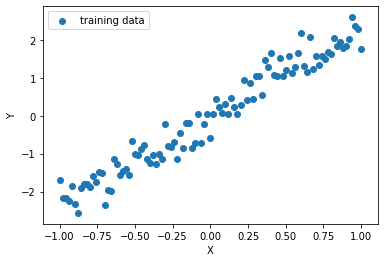

In [2]:
# generate some training data
x_train=np.linspace(-1,1,101)
y_train=2.3*x_train+np.random.randn(*x_train.shape)*0.3 # * is for unpacking

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [3]:
# parameters
training_epochs = 200
learning_rate = 0.01

In [4]:
# define model function
def linearReg(X,w):
    return tf.multiply(X,w)

In [5]:
# define placeholders, variables
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(1.0, name="weight")

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# define cost function
y_pred=linearReg(X,w)
cost=tf.reduce_mean(tf.pow(Y-y_pred,2))

In [7]:
# add summary to view on tensorboard (create the logs dir!)
weight_summary = tf.summary.scalar("weight summary", w)
writer = tf.summary.FileWriter("./logs/linear")

INFO:tensorflow:Summary name weight summary is illegal; using weight_summary instead.


In [8]:
# choose training op
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [9]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    
    for _ in range(training_epochs):
        for x,y in zip(x_train, y_train):
            summary_str, meh = sess.run([weight_summary, trainer],feed_dict={X:x,Y:y})
            sess.run(w)
            writer.add_summary(summary_str, _)
    w_val=sess.run(w)
    y_model=sess.run(linearReg(x_train,sess.run(w)))
    writer.add_graph(sess.graph)
    writer.close()
    sess.close()


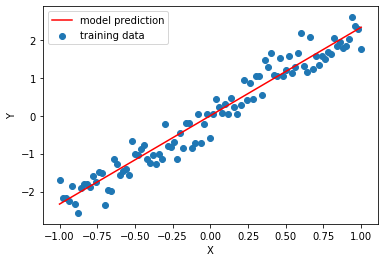

In [10]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(x_train,y_model,'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Polynomial Regression

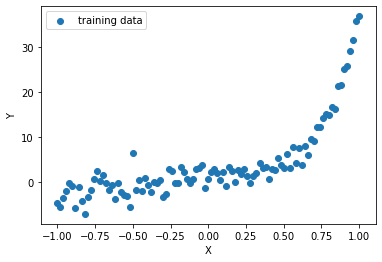

In [11]:
# generate some training data
x_train=np.linspace(-1,1,101)
num_coeff = 8
learning_rate = 0.01
training_epochs = 100
y_train_coeff = np.array([1, 3, 2, 6, 9, 8, 4, 5])

y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_train = np.dot(y_train_coeff, y_kernel) + np.random.randn(*x_train.shape)*2    

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [12]:
# define polynomial model
def polyReg(X,w):
    y_kernel = []
    for i in range(num_coeff):
        term = tf.multiply(w[i],tf.pow(X,i))
        y_kernel.append(term)
    return tf.add_n(y_kernel)

In [13]:
# define placeholders, variables
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)

In [14]:
# model tf object and cost function
y_pred=polyReg(X,w)
cost=tf.reduce_mean(tf.pow(Y-y_pred,2))

In [15]:
# add summary to view on tensorboard (create the logs dir!)
weight_summary = tf.summary.tensor_summary("weight summary", w)
writer = tf.summary.FileWriter("./logs/poly")

INFO:tensorflow:Summary name weight summary is illegal; using weight_summary instead.


In [16]:
# choose training op
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    
    for _ in range(training_epochs):
        for x,y in zip(x_train, y_train):
            summary_str, meh = sess.run([weight_summary, trainer],feed_dict={X:x,Y:y})
            sess.run(w)
            writer.add_summary(summary_str, _)
    w_val=sess.run(w)
    print(w_val)
    y_model=sess.run(polyReg(x_train,sess.run(w)))
    writer.add_graph(sess.graph)
    writer.close()
    sess.close()

[0.94255299 2.66400924 1.68250991 6.42001466 6.62011491 6.2885282
 7.41404936 5.77795719]


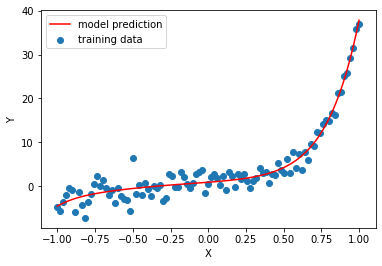

In [18]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(x_train,y_model,'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Regularization

In [19]:
from sklearn.model_selection import train_test_split

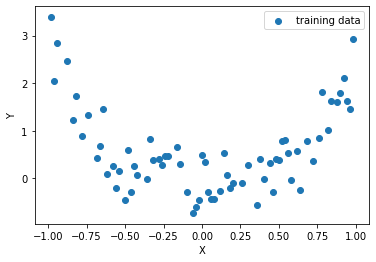

In [20]:
# generate some training data
x_train=np.linspace(-1,1,101)
num_coeff = 8
learning_rate = 0.01
training_epochs = 100
y_train_coeff = np.array([0, 0, 0, 0, 3, 0, 0, 0])

y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_train = np.dot(y_train_coeff, y_kernel) + np.random.randn(*x_train.shape)*0.5   

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.7)

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [21]:
# define placeholders, variables
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)
reg_lambda = 0

In [22]:
# model tf object and cost function
y_pred=polyReg(X,w)
cost=(tf.reduce_sum(tf.pow(Y-y_pred,2))+reg_lambda*tf.reduce_sum(tf.square(w)))/2/x_train.size
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [23]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    final_cost = []
    w_vals= {}
    for reg_lambda in np.linspace(0.0,1.0,50):
        for _ in range(training_epochs):
            sess.run(trainer,feed_dict={X:x_train,Y:y_train})
            w_val=sess.run(w)
        #print(w_val, reg_lambda)
        w_vals[reg_lambda]=w_val
        final_cost.append(sess.run(cost,feed_dict={X:x_test,Y:y_test}))
    #y_model=sess.run(polyReg(x_train,sess.run(w)))
    sess.close()

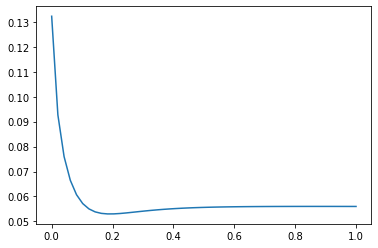

In [24]:
plt.plot(np.linspace(0.0,1.,50),final_cost)

In [25]:
minpos = final_cost.index(min(final_cost))
reg_lambda = np.linspace(0.0,1.,50)
reg_lambda[minpos]

0.18367346938775508

In [26]:
# predict
y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_model = np.dot(w_vals[reg_lambda[minpos]], y_kernel)
y_model.shape

(70,)

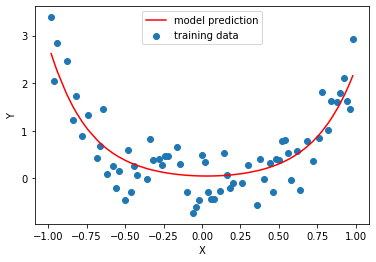

In [27]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(sorted(x_train),y_model[np.argsort(x_train)],'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Trial

Can regularization *hyper*paramenter $\lambda$ be obtained by considering it as a parameter?

In [28]:
# define placeholders, variables

X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)
reg_lambda = tf.Variable(0., name="regularization", dtype=tf.float64)

# model tf object and cost function
y_pred=polyReg(X,w)
cost=(tf.reduce_sum(tf.pow(Y-y_pred,2))+reg_lambda*tf.reduce_sum(tf.square(w)))/2/x_train.size
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    final_cost = []
    w_vals= {}
    reg_lam = []
    for _ in range(training_epochs):
        sess.run(trainer,feed_dict={X:x_train,Y:y_train})
        w_val=sess.run(w)
        lam_val = sess.run(reg_lambda)
        #print(w_val, reg_lambda)
        reg_lam.append(lam_val)
        final_cost.append(sess.run(cost,feed_dict={X:x_test,Y:y_test}))
    #y_model=sess.run(polyReg(x_train,sess.run(w)))
    sess.close()

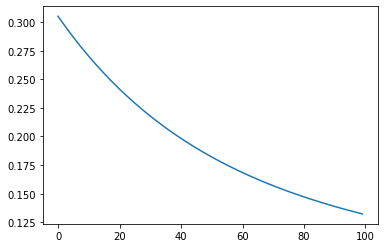

In [29]:
plt.plot(range(training_epochs),final_cost)

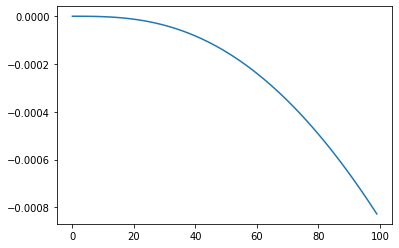

In [30]:
plt.plot(range(training_epochs),reg_lam)

It results in negative values! :(

## Linear Regression using Normal equation (closed form):

In [31]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [32]:
Y.shape

TensorShape(None)

In [33]:
X_b = np.c_[np.ones([100, 1]), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.79934296],
       [3.26472877]])

In [34]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.79934296],
       [10.3288005 ]])

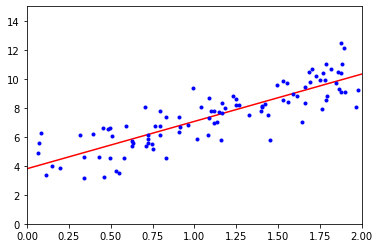

In [35]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Linear Regression using SVD (Pseudo inverse):


In [36]:
np.linalg.pinv(X_b).dot(y)

array([[3.79934296],
       [3.26472877]])

## Linear Regression using SGD with a learning schedule:

In [37]:
n_epochs = 50
m=100
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        
        
        theta = theta - eta * gradients

In [38]:
theta

array([[3.8064111 ],
       [3.25794531]])

Alternatively...

In [39]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81388145]), array([3.30635062]))

## Polynomial Regression

In [41]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [42]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[-2.17955399]


array([-2.17955399,  4.75045558])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09418163]), array([[1.02839619, 0.49947519]]))

## Learning curves

In [44]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(metrics.mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(metrics.mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

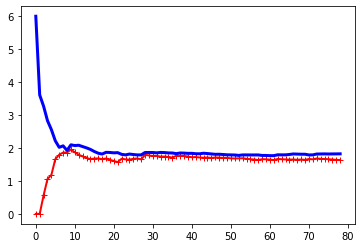

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

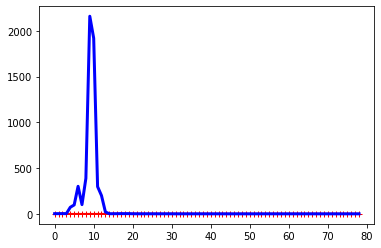

In [46]:
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)

## Ridge regression - Closed form

In [47]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [48]:
ridge_reg.predict([[1.5]])

array([[5.01892176]])

## Ridge regression - SGD

In [49]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.99734734])

## Lasso

In [50]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.96525967])

## Lasso - SGD

In [51]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.00706622])

## Elastic Net 

In [52]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.96576703])

## Early stopping

In [53]:
# prepare the data
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y.ravel(), test_size=0.2)
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = metrics.mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [54]:
best_model.fit(X_train_poly_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [55]:
best_model.predict(X_val_poly_scaled)

array([-3.40491001e-01, -2.44866124e-01,  1.95561629e+02, -3.37057944e-01,
       -3.27350302e-01,  3.37178784e-01, -3.08905992e-01, -1.32366390e-01,
       -3.26255442e-01, -3.31285769e-01,  1.73711625e-01, -3.13039783e-01,
       -3.41387462e-01, -3.37166324e-01,  3.87774383e+02, -3.24215277e-01,
        1.32371081e+02, -3.09332829e-01, -2.82894191e-01, -2.12757806e-01])

In [56]:
# in built early stopping
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, early_stopping=True,penalty=None, learning_rate="constant", eta0=0.0005)
sgd_reg.fit(X_train_poly_scaled, y_train) 

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [57]:
sgd_reg.predict(X_val_poly_scaled)

array([-1.87790102e-01, -9.69129190e-02,  2.06976951e+02, -1.82482394e-01,
       -1.95510001e-01,  3.59259473e-01, -1.53809414e-01, -1.24397623e-01,
       -1.70504889e-01, -1.95637832e-01,  2.38838953e-01, -1.57674249e-01,
       -1.90719937e-01, -1.82623404e-01,  9.83973886e+01, -1.68454866e-01,
        1.39642686e+02, -1.93041270e-01, -1.86802659e-01, -6.93715595e-02])